In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\python\code\CWRU\all_faults.csv')

In [3]:
df

,DE_data,fault
0,0.039846,14_BA
1,0.089705,14_BA
2,0.136643,14_BA
3,0.177532,14_BA
4,0.205903,14_BA
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


In [4]:
df.reset_index(inplace=True, drop=True)

In [5]:
df.shape

(2782629, 2)

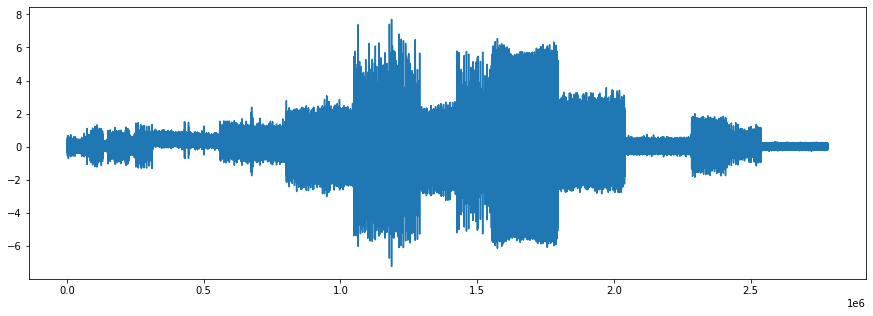

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df.iloc[:,0])
plt.show()

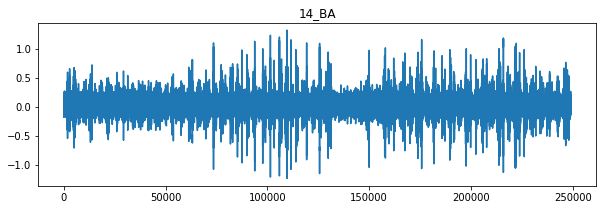

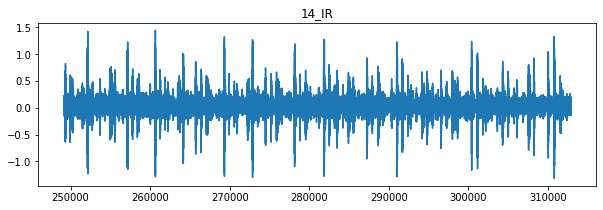

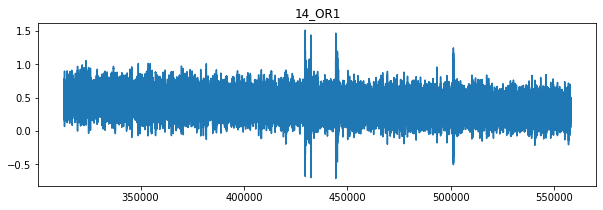

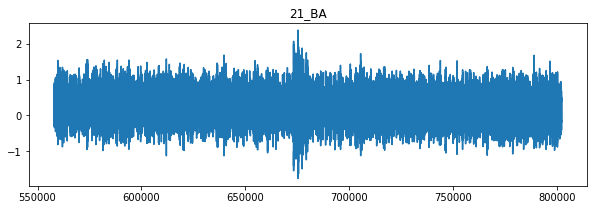

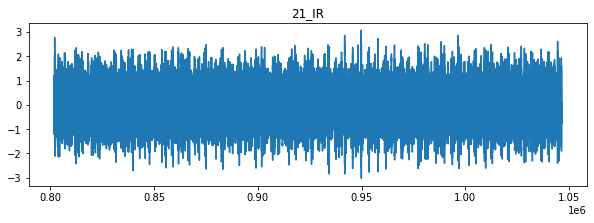

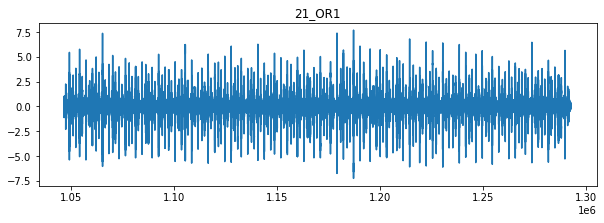

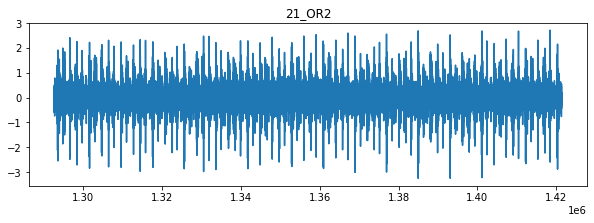

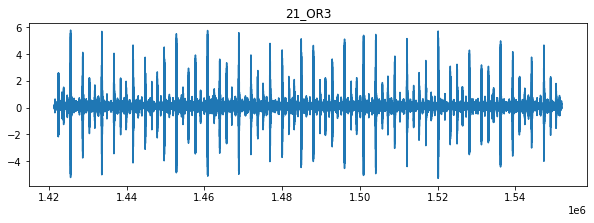

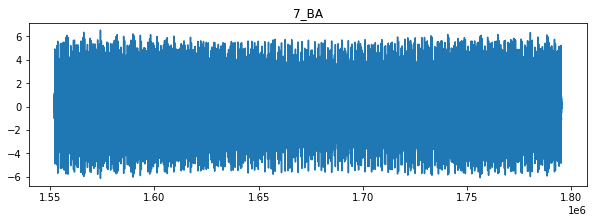

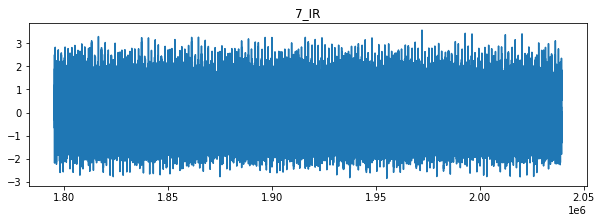

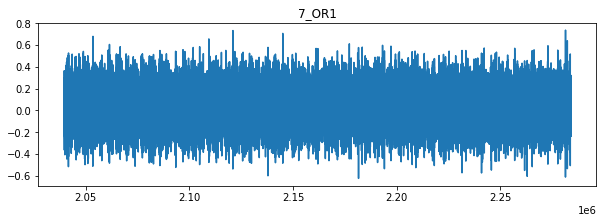

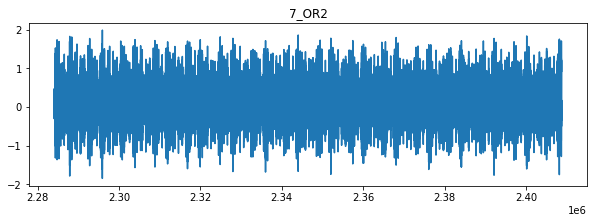

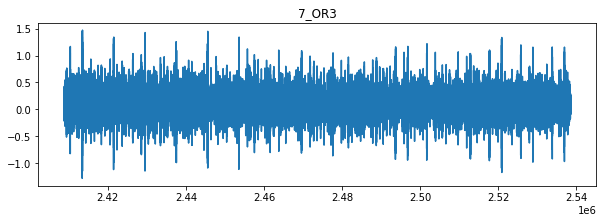

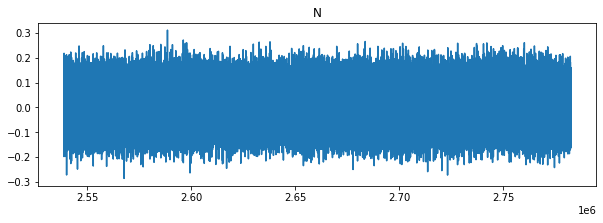

In [7]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['fault'] = encoder.fit_transform(df['fault'])

In [15]:
df

,DE_data,fault
0,0.039846,0
1,0.089705,0
2,0.136643,0
3,0.177532,0
4,0.205903,0
...,...,...
2782624,-0.059664,13
2782625,-0.063836,13
2782626,-0.034630,13
2782627,0.016689,13


In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print(X.shape)
print(y.shape)

(2782629, 1)
(2782629,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1947840, 1) (834789, 1)
(1947840,) (834789,)


In [23]:
import sklearn
import pandas as pd
import numpy as np
from math import sqrt
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

XGBoost Regressor

In [19]:
x_reg = XGBRegressor()
x_reg.fit(X_train, y_train)

x_train_acc = (x_reg.score(X_train, y_train))*100
x_test_acc = (x_reg.score(X_test, y_test))*100

print(f"Train Accuracy: {x_train_acc}")
print(f"Test Accuracy: {x_test_acc}")

Train Accuracy: 7.033510452092095
Test Accuracy: 6.969833041510931


In [20]:
y_pred = x_reg.predict(X_test)
print(y_test.shape, y_pred.shape)

(834789,) (834789,)


In [21]:
calculation = pd.DataFrame(np.c_[y_test, x_reg.predict(X_test)], columns = ['Original Fault', 'Predicted Fault'])
calculation.head(5)

,Original Fault,Predicted Fault
0,11.0,6.573440
1,0.0,6.975981
2,9.0,6.644589
3,2.0,4.468428
4,10.0,6.123580


Adaboost Regressor

In [24]:
dtree = DecisionTreeRegressor()
a_reg = AdaBoostRegressor(n_estimators=10, base_estimator=dtree, learning_rate=1)
a_reg.fit(X_train, y_train)

a_train_acc = (a_reg.score(X_train, y_train))*100
a_test_acc = (a_reg.score(X_test, y_test))*100

print(f"Train Accuracy: {a_train_acc}")
print(f"Test Accuracy: {a_test_acc}")

Train Accuracy: 8.736262129999995
Test Accuracy: 7.596604727399814


In [25]:
y_pred = a_reg.predict(X_test)
print(y_test.shape, y_pred.shape)

(834789,) (834789,)


In [26]:
r2_a = r2_score(y_test, y_pred)*100
rms_a = sqrt(mean_squared_error(y_test, y_pred))
mae_a = mean_absolute_error(y_test, y_pred)
print(f"R^2 score of model is {r2_a} %")
print(f"Root mean squared error is {rms_a}")
print(f"Mean Absolute Error is {mae_a}")

R^2 score of model is 7.596604727399814 %
Root mean squared error is 3.838525339728051
Mean Absolute Error is 3.285810884649189


In [27]:
calculation = pd.DataFrame(np.c_[y_test, a_reg.predict(X_test)], columns = ['Original Fault', 'Predicted Fault'])
calculation.head(5)

,Original Fault,Predicted Fault
0,11.0,6.024390
1,0.0,6.004435
2,9.0,5.957854
3,2.0,5.535714
4,10.0,6.512821


In [28]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [29]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 14
}

In [30]:
bst = xgb.train(params, dtrain)

In [31]:
pred = bst.predict(dtest)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=encoder.classes_))

c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

       14_BA       0.16      0.13      0.14     74952
       14_IR       0.00      0.00      0.00     19162
      14_OR1       0.31      0.86      0.45     73519
       21_BA       0.23      0.08      0.12     73446
       21_IR       0.21      0.24      0.23     73030
      21_OR1       0.43      0.01      0.01     73797
      21_OR2       0.00      0.00      0.00     38703
      21_OR3       0.00      0.00      0.00     39391
        7_BA       0.43      0.26      0.33     72986
        7_IR       0.16      0.04      0.06     72878
       7_OR1       0.14      0.21      0.17     73641
       7_OR2       0.00      0.00      0.00     37380
       7_OR3       0.00      0.00      0.00     38909
           N       0.21      0.81      0.34     72995

    accuracy                           0.23    834789
   macro avg       0.16      0.19      0.13    834789
weighted avg       0.20      0.23      0.16    834789



XGBoost Classifier

In [33]:
x_class = XGBClassifier()
x_class.fit(X_train, y_train)

x_train_acc = (x_class.score(X_train, y_train))*100
x_test_acc = (x_class.score(X_test, y_test))*100

print(f"Train Accuracy: {x_train_acc}")
print(f"Test Accuracy: {x_test_acc}")

Train Accuracy: 26.237524642681127
Test Accuracy: 25.996868669807583


In [34]:
y_pred = x_class.predict(X_test)
print(y_test.shape, y_pred.shape)

(834789,) (834789,)


In [35]:
accuracy_x = accuracy_score(y_test, y_pred)*100
print(f"Accuracy of model is {accuracy_x} %")

Accuracy of model is 25.996868669807583 %


In [36]:
calculation = pd.DataFrame(np.c_[y_test, x_class.predict(X_test)], columns = ['Original Fault', 'Predicted Fault'])
calculation.head(5)

,Original Fault,Predicted Fault
0,11,10
1,0,13
2,9,4
3,2,2
4,10,2


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

       14_BA       0.19      0.16      0.17     74952
       14_IR       0.22      0.00      0.01     19162
      14_OR1       0.32      0.85      0.46     73519
       21_BA       0.25      0.11      0.16     73446
       21_IR       0.23      0.30      0.26     73030
      21_OR1       0.36      0.17      0.23     73797
      21_OR2       0.21      0.00      0.01     38703
      21_OR3       0.28      0.11      0.16     39391
        7_BA       0.43      0.26      0.33     72986
        7_IR       0.29      0.03      0.05     72878
       7_OR1       0.18      0.28      0.22     73641
       7_OR2       0.28      0.00      0.00     37380
       7_OR3       0.18      0.00      0.00     38909
           N       0.23      0.75      0.35     72995

    accuracy                           0.26    834789
   macro avg       0.26      0.22      0.17    834789
weighted avg       0.27      0.26      0.20    834789



Adaboost Classifier

In [ ]:
dtree_class = DecisionTreeClassifier()
a_class = AdaBoostClassifier(n_estimators=10, base_estimator=dtree_class, learning_rate=1)
a_class.fit(X_train, y_train)

a_train_acc = (a_class.score(X_train, y_train))*100
a_test_acc = (a_class.score(X_test, y_test))*100

print(f"Train Accuracy: {a_train_acc}")
print(f"Test Accuracy: {a_test_acc}")

In [ ]:
y_pred = a_class.predict(X_test)
print(y_test.shape, y_pred.shape)

In [ ]:
accuracy_a = accuracy_score(y_test, y_pred)*100
print(f"Accuracy of model is {accuracy_a} %")

In [ ]:
calculation = pd.DataFrame(np.c_[y_test, a_class.predict(X_test)], columns = ['Original Fault', 'Predicted Fault'])
calculation.head(5)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=encoder.classes_))